In [9]:
import numpy
import scipy
from scipy import special
import matplotlib.pyplot as plt

%matplotlib inline

In [18]:
# defenition of neural net class
class neuralNetwork:
    
    # neural net initialization
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        
        # set the number of nodes(узлов) in all layers
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # learning rate
        self.lr = learningrate
        
        # coef matrices wih{input-hidden} and who{hidden-output}
        # coefs from i node to j node is w_i_j
        self.wih = numpy.random.normal(0.0, pow(self.hnodes,-0.5),
                                      (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0,pow(self.onodes,-0.5),
                                      (self.onodes, self.hnodes))
        
        # activation fucntion
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass
    
    
    # neural net training
    def train(self, inputs_list, targets_list):
        
        #convert input_list and targets_list into 2d array
        inputs = numpy.array(inputs_list, ndmin = 2).T
        targets = numpy.array(targets_list, ndmin = 2).T
        
        # input and output signals of hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # input and output signals of output layer
        final_inputs = numpy.dot(self.who,hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        # error
        output_errors = targets - final_outputs
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        # update weights of hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs *
                                        (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        # update weights of input and hodden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs *
                                       (1.0 - hidden_outputs)), numpy.transpose(inputs))
        pass
    
    # neural net query
    def query(self,inputs_list):
        
        #convert input_list into 2d array
        inputs = numpy.array(inputs_list, ndmin = 2).T
        
        # input and output signals of hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # input and output signals of output layer
        final_inputs = numpy.dot(self.who,hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [19]:
#number of nodes in layers
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

# learning rete equals 0,3
learning_rate = 0.3

# create the neural net example
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)

In [2]:
training_data_file = open('Desktop/MNIST/mnist_train_100.csv', 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [23]:
#training
for record in training_data_list:
    all_values = record.split(',')
    inputs = (numpy.asfarray(all_values[1:])/255.0*0.99) + 0.01
    
    targets = numpy.zeros(output_nodes) + 0.01
    targets[int(all_values[0])] = 0.99
    n.train(inputs, targets)
    pass

In [26]:
test_data_file = open('Desktop/MNIST/mnist_10.csv', 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [32]:
#testing NN

scorecard = []

# go through all test examples
for record in test_data_list:
    all_values = record.split(',')
    correct_label = int(all_values[0])
    print (correct_label,'Correct label')
    
    # input into NN
    inn = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    
    #Neural Net query
    #outn = output of NN
    outn = n.query(inn)
    label = numpy.argmax(outn)
    print(label,'Neural Net answer')
    
    if (label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
    pass


7 Correct label
7 Neural Net answer
2 Correct label
0 Neural Net answer
1 Correct label
1 Neural Net answer
0 Correct label
0 Neural Net answer
4 Correct label
4 Neural Net answer
1 Correct label
1 Neural Net answer
4 Correct label
4 Neural Net answer
9 Correct label
3 Neural Net answer
5 Correct label
4 Neural Net answer
9 Correct label
7 Neural Net answer


In [33]:
scorecard

[1, 0, 1, 1, 1, 1, 1, 0, 0, 0]

In [38]:
# final score
scorecard_array = numpy.array(scorecard)
print('Score =', scorecard_array.sum()/scorecard_array.size)

Score = 0.6


# Arman doing fun:

In [3]:
interesting = []
for record in training_data_list:
    all_values = record.split(',')
    interesting.append(int(all_values[0]))
    pass

(array([ 13.,  14.,   6.,  11.,  11.,   5.,  11.,  10.,   8.,  11.]),
 array([ 0. ,  0.9,  1.8,  2.7,  3.6,  4.5,  5.4,  6.3,  7.2,  8.1,  9. ]),
 <a list of 10 Patch objects>)

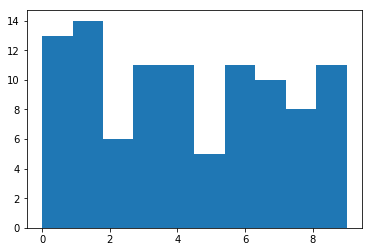

In [10]:
plt.figure()
hist = numpy.histogram(interesting)[0]
plt.hist(interesting)